# IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings

warnings.filterwarnings("ignore")

# MEMBACA DATASET

In [2]:
#shahla_202131177
data = pd.read_csv("data_balita.csv")
data

,Umur(bulan),JenisKelamin,TinggiBadan,StatusGizi
0,31,pria,95.0,normal
1,28,pria,79.8,severely stunted
2,30,wanita,78.1,severely stunted
3,54,wanita,107.6,normal
4,25,pria,84.8,normal
...,...,...,...,...
495,14,pria,69.0,severely stunted
496,15,pria,84.2,normal
497,25,wanita,85.2,normal
498,48,pria,86.5,severely stunted


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Umur(bulan)   500 non-null    int64  
 1   JenisKelamin  500 non-null    object 
 2   TinggiBadan   500 non-null    float64
 3   StatusGizi    500 non-null    object 
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()
data["StatusGizi"] = encode.fit_transform(data["StatusGizi"])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Umur(bulan)   500 non-null    int64  
 1   JenisKelamin  500 non-null    object 
 2   TinggiBadan   500 non-null    float64
 3   StatusGizi    500 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(1)
memory usage: 13.8+ KB


# MEMILIH DATA DARI DATASET UNTUK DIGUNAKAN SEBAGAI ATRIBUT X

In [6]:
#shahla_202131177
data = data[["TinggiBadan","StatusGizi"]]
data.head(10)

,TinggiBadan,StatusGizi
0,95.0,0
1,79.8,1
2,78.1,1
3,107.6,0
4,84.8,0
5,108.7,3
6,95.8,0
7,102.7,0
8,107.0,0
9,105.7,0


# Melihat Ringkasan Statistik

In [7]:
#shahla_202131177
data.describe()

,TinggiBadan,StatusGizi
count,500.000000,500.000000
mean,89.355914,0.844000
std,16.740863,1.146426
min,43.904264,0.000000
25%,79.775000,0.000000
50%,90.800000,0.000000
75%,100.650000,2.000000
max,124.500000,3.000000


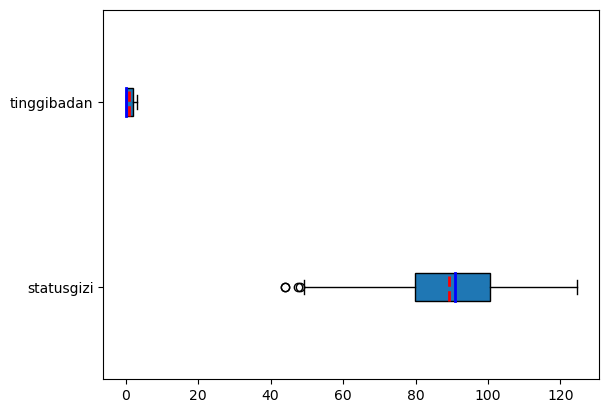

In [8]:
fig, ax = plt.subplots() #boxplot untuk memberikan gambar visual
ax.boxplot(data,
          vert = False,
          showmeans = True,
          meanline = True,
          labels = ('statusgizi', "tinggibadan"),
          patch_artist = True,
          medianprops = {"linewidth" : 2, "color" : "blue"},
          meanprops = {"linewidth" : 2, "color" : "red"})
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

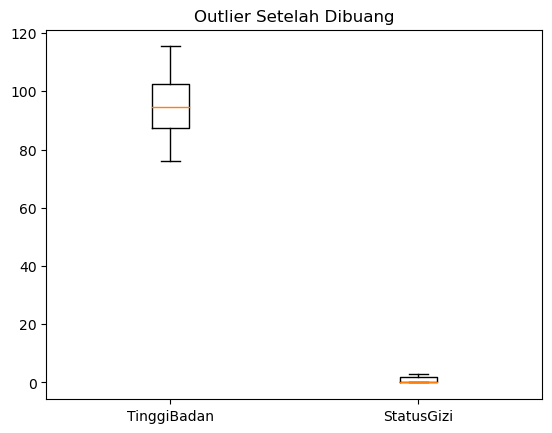

In [9]:
kolom = ["TinggiBadan", "StatusGizi"]

#menggunakan metode IQR untuk mengidentifikasi dan menghapus outlier
Q1 = data[kolom].quantile(0.5)
Q3 = data[kolom].quantile(0.75)
IQR = Q3-Q1
data = data[~((data[kolom]<(Q1 - 1.5 * IQR))|
              (data[kolom]>(Q3 + 1.5 * IQR))).any(axis = 1)]

plt.boxplot(data[kolom])
plt.xticks([1,2], kolom)
plt.title("Outlier Setelah Dibuang")
plt.show

In [10]:
#shahla_202131177
data.describe()

,TinggiBadan,StatusGizi
count,377.000000,377.000000
mean,94.938462,0.793103
std,10.045854,1.157609
min,76.100000,0.000000
25%,87.400000,0.000000
50%,94.600000,0.000000
75%,102.500000,2.000000
max,115.400000,3.000000


In [11]:
#shahla_202131177
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 377 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TinggiBadan  377 non-null    float64
 1   StatusGizi   377 non-null    int32  
dtypes: float64(1), int32(1)
memory usage: 7.4 KB


# Membuat Nilai X

In [12]:
#shahla_202131177
x_array = np.array(data)

# Visualisasi Pesebaran Data

<function matplotlib.pyplot.show(close=None, block=None)>

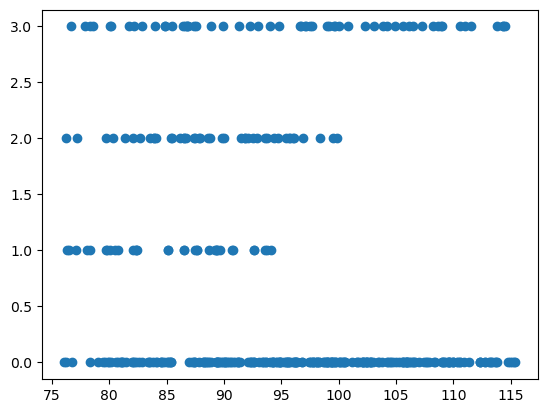

In [13]:
plt.scatter(data.TinggiBadan, data.StatusGizi)
plt.show

# Standarisasi

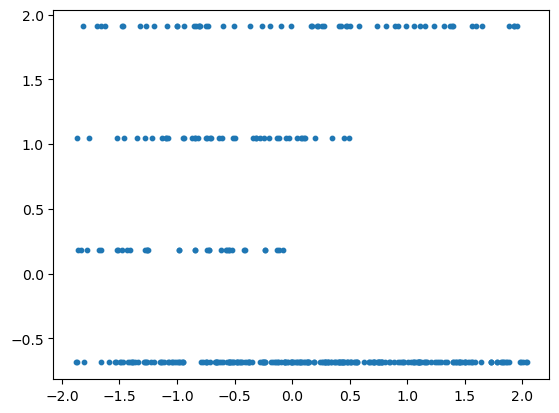

In [14]:
#shahla_202131177
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_array)
plt.scatter(x_scaled[:,0], x_scaled[:,1], s=10)
plt.show()

# Cek SUM OF SQUARE ERROR Dari Tiap Pembagian Jumlah Cluster

In [15]:
#shahla_202131177
from sklearn.cluster import KMeans
sse = []
index =  range(1,10)
for i in index :
    kmeans = KMeans (n_clusters = i, random_state = 0, n_init="auto")
    kmeans.fit(x_scaled)
    sse_ = kmeans.inertia_
    sse.append(sse_)
    print(i,sse_)

1 754.0000000000001
2 411.26340789549266
3 216.8970003572669
4 146.9146208286777
5 116.74074539480608
6 86.4587867994234
7 67.92404162106564
8 59.07586899265664
9 46.10626263025601


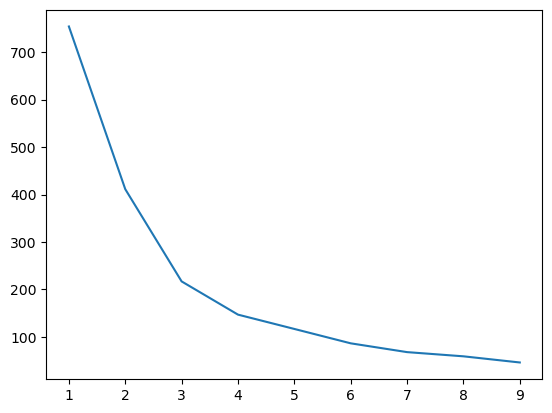

In [16]:
#shahla_202131177
plt.plot(index, sse)
plt.show()

# Membuat Model

In [17]:
#shahla_202131177
kmeans = KMeans (n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(x_scaled)

KMeans(n_clusters=3, n_init='auto', random_state=0)

# Melihat Cluster Pusat

In [18]:
#shahla_202131177
kmeans.cluster_centers_

array([[-0.78019771, -0.46818127],
       [ 0.89812508, -0.68603248],
       [-0.18944364,  1.53944647]])

# Visualisasi Persebaran Data Setelah Clustering

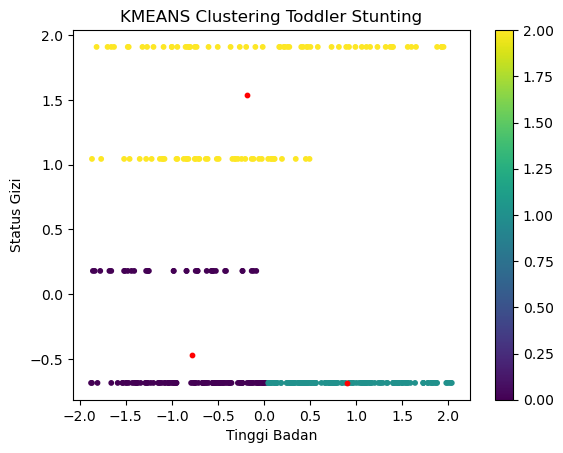

In [19]:
#shahla_202131177
output = plt.scatter(x_scaled[:,0],x_scaled[:,1], s=10, c = kmeans.labels_)

centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c="red", s=10)
plt.title("KMEANS Clustering Toddler Stunting")
plt.xlabel("Tinggi Badan")
plt.ylabel("Status Gizi")
plt.colorbar(output)
plt.show()

# Evaluasi Model

In [20]:
#shahla_202131177
from sklearn.metrics import davies_bouldin_score
labels = kmeans.labels_
davies_bouldin_score(x_scaled, labels)

0.7082916117982538